In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from random import gauss
from random import seed
from pandas import Series
import matplotlib.pyplot as plt
import pandas as pd
seed(2)

In [4]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [6]:
series = [gauss(0.0, 1.0) for i in range(500)]
series = Series(series)

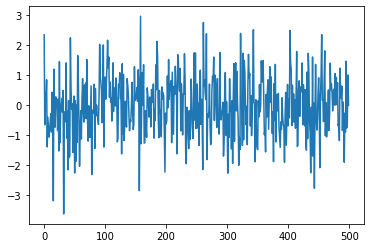

In [7]:
series.plot()
plt.show()

addition of noise

In [8]:
extra = np.random.standard_normal(500)

In [9]:
signal = series+extra

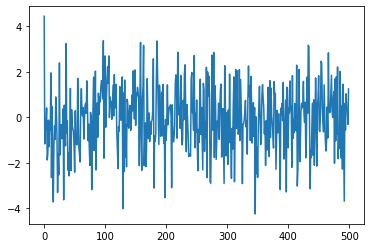

In [10]:
signal.plot()
plt.show()

In [25]:
signal

0      4.435112
1     -1.168440
2     -0.469063
3     -0.357620
4      0.410531
         ...   
495    1.032354
496    0.317798
497    0.327142
498   -0.311626
499    1.245116
Length: 500, dtype: float64

In [20]:
n_steps = 3
X, y = prepare_data(signal, n_steps)

In [21]:
X.shape,y.shape

((497, 3), (497,))

In [22]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [23]:
X.shape,y.shape

((497, 3, 1), (497,))

In [24]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
16/16 [==============================] - 5s 14ms/step - loss: 2.0480
Epoch 2/300
16/16 [==============================] - 0s 14ms/step - loss: 2.0469
Epoch 3/300
16/16 [==============================] - 0s 15ms/step - loss: 2.0450
Epoch 4/300
16/16 [==============================] - 0s 14ms/step - loss: 2.0435
Epoch 5/300
16/16 [==============================] - 0s 14ms/step - loss: 2.0437
Epoch 6/300
16/16 [==============================] - 0s 16ms/step - loss: 2.0439
Epoch 7/300
16/16 [==============================] - 0s 17ms/step - loss: 2.0433
Epoch 8/300
16/16 [==============================] - 0s 15ms/step - loss: 2.0427
Epoch 9/300
16/16 [==============================] - 0s 15ms/step - loss: 2.0421
Epoch 10/300
16/16 [==============================] - 0s 14ms/step - loss: 2.0412
Epoch 11/300
16/16 [==============================] - 0s 15ms/step - loss: 2.0413
Epoch 12/300
16/16 [==============================] - 0s 14ms/step - loss: 2.0400
Epoch 13/300
16/16 [=====

In [ ]:
x_input = np.array([4.435, 1.011,-1.034])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
print(lst_output)

In [33]:
df = pd.DataFrame(lst_output,index=index)

In [34]:
df

,0
501,4.922511
502,-1.284455
503,0.980352
504,4.691980
505,-1.030443
506,-1.448658
507,2.632212
508,-0.054072
509,-0.947161
510,1.024021


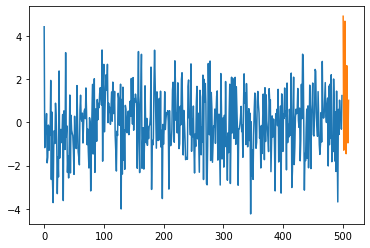

In [36]:
plt.plot(signal)
plt.plot(df)